# Contexto

En primer lugar, se instalan/importan las librerías necesarias para el modelo


In [1]:
# Descomentar esta línea si se quiere ejecutar en local
!pip install yfinance

     |████████████████████████████████| 6.4 MB 35.8 MB/s 
     |████████████████████████████████| 62 kB 476 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import yfinance as yf

import pandas as pd
import matplotlib. pyplot as plt

In [ ]:
# Importar el fichero import_data_stock_prediction.py, el cual se conecta a Yahoo Finance e importa los datos
from google.colab import drive
drive.mount('/content/drive')

execfile('/content/drive/MyDrive/StockPrediction/import_data_stock_prediction.py')

Mounted at /content/drive


## Importación S&P 500

Se obtiene el identificador de las top 500 empresas americanas (S&P 500) a través de internet.

In [ ]:
# Se obtienen el identificador de las top 500 empresas americanas (S&P 500)
sp_500_tickers = pd.read_html(
    'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
print(sp_500_tickers.head())

  Symbol             Security  ...      CIK      Founded
0    MMM                   3M  ...    66740         1902
1    ABT  Abbott Laboratories  ...     1800         1888
2   ABBV               AbbVie  ...  1551152  2013 (1888)
3   ABMD              Abiomed  ...   815094         1981
4    ACN            Accenture  ...  1467373         1989

[5 rows x 9 columns]


Se recorren las 500 empresas y se crea un DataFrame con las variables más identificativas.

In [ ]:
def Get_SP500():
    # Fechas de Inicio y Fin para obtener los datos.
    five_years_ago = datetime.now() - relativedelta(years=5)
    start_date = five_years_ago.strftime('%Y-%m-%d')
    end_date = datetime.now().strftime('%Y-%m-%d')

    sp_500_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
    sp_500_tickers = sp_500_tickers["Symbol"].values.tolist()
    sp_500_tickers = sorted(sp_500_tickers)

    sp_500 = pd.DataFrame(columns=['Ticker', 'Short Name', 'Sector', 'Industry', 'Recommendation', 'Recommendation Mean', 'Target Low Price', 'Target High Price', 'Target Mean Price', 'Current Price', '%', 'Volume', 'Average Volume', 'EBITDA', 'EBITDA Margins', 'Fecha Actualización', '52 Week Change', 'SMA20', 'SMA50', 'SMA100'])

    for company in sp_500_tickers:
        company = company.replace(".", "-")
        
        newCompany = GetStockInformationByTicker(company, start_date, end_date)
        sp_500 = sp_500.append(newCompany, ignore_index=True)

    return sp_500

In [ ]:
sp_500 = Get_SP500()

sp_500.head(5)

,Ticker,Short Name,Sector,Industry,Recommendation,Recommendation Mean,Target Low Price,Target High Price,Target Mean Price,Current Price,%,Volume,Average Volume,EBITDA,EBITDA Margins,Fecha Actualización,52 Week Change,SMA20,SMA50,SMA100
0,A,"Agilent Technologies, Inc.",Healthcare,Diagnostics & Research,none,None,None,None,None,151.42,0,2541469,1538426,1728999936,0.27362,2021-12-19 12:18,0.285617,"153,84500045776366","155,62199981689454","160,5535188293457"
1,AAL,"American Airlines Group, Inc.",Industrials,Airlines,hold,3.1,5,28,19.11,16.95,0,41295115,34681701,-4754999808,-0.19422,2021-12-19 12:19,0.0527951,"17,801500034332275","19,190200004577637","19,662299976348876"
2,AAP,Advance Auto Parts Inc.,Consumer Cyclical,Specialty Retail,buy,2.2,142,290,254.69,232.82,0,1356394,644132,1199138048,0.10935,2021-12-19 12:19,0.450682,"230,8213348388672","228,13306579589843","217,1766372680664"
3,AAPL,Apple Inc.,Technology,Consumer Electronics,buy,1.8,128.01,210,174.22,171.14,0,195923241,89710154,120233000960,0.32867,2021-12-19 12:19,0.334633,"167,80000076293945","156,24901611328124","151,7442219543457"
4,ABBV,AbbVie Inc.,Healthcare,Drug Manufacturers—General,buy,1.9,105,172,133.8,129.53,0,9797813,6326093,28854999040,0.52303,2021-12-19 12:19,0.248963,"121,47150039672852","116,11612152099609","113,7784359741211"


## Análisis S&P 500

Se crea algunas gráficas que nos ayudan a entender cómo funciona el mercado.

Text(0.5, 1.0, 'Agrupación de S&P500 por Sector')

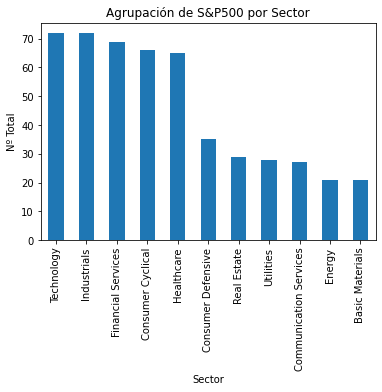

In [ ]:
df_sector = sp_500.groupby(['Sector']).size()
df_sector = df_sector.sort_values(ascending=False)
df_sector.plot(kind = 'bar', x='Sector', y='Nº Total')
plt.xlabel('Sector')
plt.ylabel('Nº Total')
plt.title('Agrupación de S&P500 por Sector')

Text(0.5, 1.0, 'Agrupación de S&P500 por Industria')

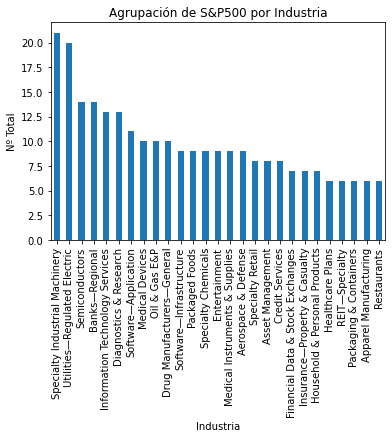

In [ ]:
df_sector = sp_500.groupby(['Industry']).size()
df_sector = df_sector.sort_values(ascending=False)
df_sector = df_sector[df_sector > 5]
df_sector.plot(kind = 'bar', x='Industry', y='Nº Total')
plt.xlabel('Industria')
plt.ylabel('Nº Total')
plt.title('Agrupación de S&P500 por Industria')

Text(0.5, 1.0, '10 empresas con más volumen agrupadas por sector')

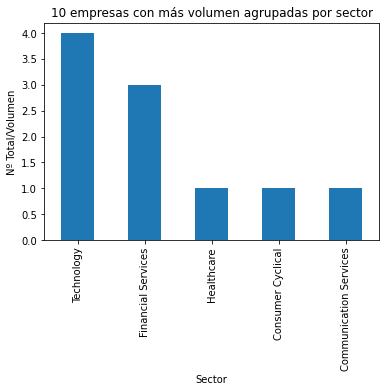

In [ ]:
df_top10_volume = sp_500.sort_values('Volume', ascending=False).head(10)
df_sector = df_top10_volume.groupby(['Sector']).size()
df_sector = df_sector.sort_values(ascending=False)
df_sector.plot(kind = 'bar')
plt.xlabel('Sector')
plt.ylabel('Nº Total/Volumen')
plt.title('10 empresas con más volumen agrupadas por sector')

In [ ]:
df_top10_recommendation = sp_500[sp_500['Recommendation Mean'] > 0]
df_top10_recommendation = df_top10_recommendation.sort_values('Recommendation Mean', ascending=True).head(10)
df_top10_recommendation.head(10)

,Ticker,Short Name,Sector,Industry,Recommendation,Recommendation Mean,Target Low Price,Target High Price,Target Mean Price,Current Price,%,Volume,Average Volume,EBITDA,EBITDA Margins,Fecha Actualización,52 Week Change,SMA20,SMA50,SMA100
62,BIO,"Bio-Rad Laboratories, Inc.",Healthcare,Medical Devices,strong_buy,1.5,795,930,856.25,731.46,0,300089,117250,758889984,0.25469,2021-12-19 12:24,None,"748,0674926757813","750,1915966796874","762,9237982177734"
278,LKQ,LKQ Corporation,Consumer Cyclical,Auto Parts,strong_buy,1.5,60,65,62.11,55.73,0,3127326,1683767,1781287040,0.13855,2021-12-19 12:57,None,"57,39799976348877","56,66759994506836","53,908600120544435"
223,HOLX,"Hologic, Inc.",Healthcare,Medical Instruments & Supplies,buy,1.6,75,95,85.5,77.71,0,2189063,1482514,3072699904,0.54263,2021-12-19 12:48,None,"75,30600051879883","73,2240005493164","74,89860008239746"
419,STE,STERIS plc (Ireland),Healthcare,Medical Devices,buy,1.6,239,255,249.6,232.54,0,770447,471765,940945984,0.24454,2021-12-19 13:18,None,"227,26149978637696","228,09772827148439","221,2382846069336"
391,RE,"Everest Re Group, Ltd.",Financial Services,Insurance—Reinsurance,buy,1.6,285,358,320.33,266.93,0,574682,230978,None,0,2021-12-19 13:14,None,"267,92832641601564","270,58240112304685","264,5469039916992"
319,MSFT,Microsoft Corporation,Technology,Software—Infrastructure,buy,1.6,275,411,329.18,323.8,0,47983703,26814534,85745000448,0.48649,2021-12-19 13:03,None,"333,04099731445314","325,6827996826172","310,13749908447267"
151,DXCM,"DexCom, Inc.",Healthcare,Diagnostics & Research,buy,1.6,475,600,522.55,555.34,0,1300110,676778,415800000,0.19162,2021-12-19 12:37,None,"564,3355010986328","582,3752026367188","556,4039996337891"
204,GNRC,Generac Holdlings Inc.,Industrials,Specialty Industrial Machinery,buy,1.6,455,540,497,357.43,0,1643519,770359,682561984,0.24233,2021-12-19 12:45,None,"388,52549896240237","427,2937982177734","425,3751983642578"
205,GOOG,Alphabet Inc.,Communication Services,Internet Content & Information,buy,1.6,2700,3400,3103.33,2856.06,0,2170235,1169984,85196996608,0.35616,2021-12-19 12:46,None,"2913,8120239257814","2901,798408203125","2850,7538061523437"
118,CTLT,"Catalent, Inc.",Healthcare,Drug Manufacturers—Specialty & Generic,buy,1.7,122,162,150.25,125.37,0,2987270,958081,1023000000,0.24491,2021-12-19 12:32,None,"126,50849990844726","128,84560012817383","129,41000030517577"


In [ ]:
df_worst5_recommendation = sp_500[sp_500['Recommendation Mean'] > 0]
df_worst5_recommendation = df_worst5_recommendation.sort_values('Recommendation Mean', ascending=False).head(5)
df_worst5_recommendation.head(5)

,Ticker,Short Name,Sector,Industry,Recommendation,Recommendation Mean,Target Low Price,Target High Price,Target Mean Price,Current Price,%,Volume,Average Volume,EBITDA,EBITDA Margins,Fecha Actualización,52 Week Change,SMA20,SMA50,SMA100
285,LUMN,"Lumen Technologies, Inc.",Communication Services,Telecom Services,hold,3.5,10,15,11.56,12.59,0,34110682,11038515,8522999808,0.42099,2021-12-19 12:58,None,"12,54699993133545","12,727199993133546","12,537600011825562"
454,UA,"Under Armour, Inc.",Consumer Cyclical,Apparel Manufacturing,hold,3.5,10,26.2,18.1,17.71,0,4692736,2456325,635043968,0.11662,2021-12-19 13:24,None,"20,158999919891357","19,877600021362305","19,69060001373291"
155,ED,"Consolidated Edison, Inc.",Utilities,Utilities—Regulated Electric,hold,3.5,66,83.78,75.42,83.82,0,4468499,2623662,4499999744,0.35464,2021-12-19 12:38,None,"80,86049957275391","77,65639465332032","75,83391593933105"
60,BF-B,Brown Forman Inc,Consumer Defensive,Beverages—Wineries & Distilleries,hold,3.3,62,90,71.68,71.9,0,1839491,834600,1092999936,0.3158,2021-12-19 12:24,None,"71,99706840515137","70,37538513183594","69,39382003784179"
227,HRL,Hormel Foods Corporation,Consumer Defensive,Packaged Foods,hold,3.2,42,50,45.56,48.17,0,4445177,2228265,1356862976,0.13108,2021-12-19 12:49,None,"44,27350006103516","43,28406997680664","43,41173599243164"
